In [28]:
import graph_tool.all as gt
import numpy as np
from numpy.random import poisson
import time
from heapq import heappush, heappop
import matplotlib.pyplot as plt
from spKMC import *

In [29]:
T = 365 #time
T_granularity = 1
N=10**4 #number of nodes
g = gt.random_graph(N, lambda: (poisson(3), poisson(3)))
num_sim = 10**2 #simulations
#gamma = 1/14 day^-1; alpha = 1/5 day^-1; beta = 3/14 day^-1 from lucas 
epi_params = {"alpha":1/5, "beta": 3/14,"gamma":1/14}

S_dynamics = np.zeros((num_sim,T))
E_dynamics = np.zeros((num_sim,T))
I_dynamics = np.zeros((num_sim,T))
R_dynamics = np.zeros((num_sim,T))
t_dynamics = np.asarray(range(0,T))

for x in range(num_sim):
    print(f"%d," %x, end =" ")
    dynamics_hidden_state = spKMC_SEIR_full_state(g_base__ = g, epi_params__= epi_params, source__=0)
    state_res = event_driven_state_extraction(dynamics_hidden_state, T)
    
    S_dynamics[x,:]= state_res["S"]
    E_dynamics[x,:]= state_res["E"]
    I_dynamics[x,:]= state_res["I"]
    R_dynamics[x,:]= state_res["R"]

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

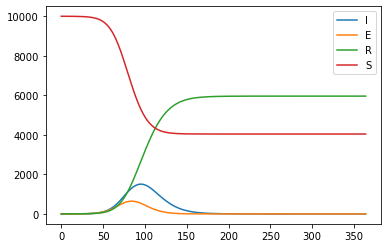

In [30]:

plt.plot(np.mean(I_dynamics, axis=0))
plt.plot(np.mean(E_dynamics,axis=0))
plt.plot(np.mean(R_dynamics, axis=0))
plt.plot(np.mean(S_dynamics,axis=0))
plt.legend("IERS")
